# Clean and Analyze Employee Exit Surveys

In this project, we'll clean and analyze exit surveys from employees of the Department of Education, Training and Employment (DETE)}) and the Technical and Further Education (TAFE) body of the Queensland government in Australia. 
<br>
<br>
We'll try to answer the following question:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

To achieve our goal, we need to do the followings:
- Import the data from 2 different sources
- Clean and filter the data in the 2 datasets
- Merge 2 datasources and analysis the data

## Read the data 

In [1]:
import pandas as pd 
import numpy as np 

dete_survey = pd.read_csv('dete_survey.csv', encoding='cp1252')
tafe_survey = pd.read_csv('tafe_survey.csv', encoding='cp1252')

In [2]:
dete_survey.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
tafe_survey.head(5)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 – 30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 – 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [5]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null int64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-nu

From the information, we can see that there are some issues in the data:
- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN
- Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis
- Each dataframe contains many of the same columns, but the column names are different

## Clean the data 

To start, we'll handle the first two issues. Recall that we can use the pd.read_csv() function to specify values that should be represented as NaN. We'll use this function to fix the missing values first. Then, we'll drop columns we know we don't need for our analysis.

In [6]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
dete_survey.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

Next, we need to uniform the columns in two datasets.

In [8]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [9]:
columns_change = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype',  
          'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 
          'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 
          'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 
           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
          }
tafe_survey_updated.rename(columns = columns_change, inplace = True)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification', 'institute_service',
       'role_service'],
      dtype='object')

## Verify the data  

The first column that we need to check is the cease date in both data set. 
<br>
<br>
In the cease_date column, we would expect that all the values are on or before year 2016, because the survey is conducted in 2016 and it would not be reasonable if the cease date is afterwards.

In [10]:
dete_survey_updated['cease_date'].value_counts()

2012       344
2013       200
01/2014     43
12/2013     40
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
04/2014      2
02/2014      2
04/2013      2
08/2012      2
07/2014      2
2010         1
07/2006      1
09/2010      1
11/2012      1
2014         1
09/2014      1
07/2012      1
Name: cease_date, dtype: int64

In [11]:
tafe_survey_updated['cease_date'].value_counts()

2011.0    268
2012.0    235
2010.0    103
2013.0     85
2009.0      4
Name: cease_date, dtype: int64

The cease_date column format in dete survey and tafe survey are different. 
To uniformize the two columns, we can first convert the cease_date column values to datetime format, and extract only the year value 

In [12]:
dete_survey_updated['cease_date'] =  pd.to_datetime(dete_survey_updated['cease_date'])
dete_survey_updated['cease_date'].apply(lambda x: x.year).value_counts()

2013.0    380
2012.0    354
2014.0     51
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

The result shows that the in generall, there data is mainly between 2009 and 2014, which would be reasonable. 
Therefore we would leave it as it is. 

## Filter the data  

For this project, we'll only analyze survey respondents who resigned, so we'll only select separation types containing the string 'Resignation'.
<br>
<br>
First we can see the distribution of separation type for dete data

In [13]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [14]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In the dete survey data, the resigned staffs are further divided into 3 categories: Resignation-Other reasons, Resignation-Other employer, Resignation-Move overseas/interstate 
<br>
<br>
They should be grouped into a single group. 

In [15]:
def separation_type_update(ele):
    if ele.lower().find('resignation') > -1:
        return 'Resignation'
    else:
        return ele

dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].apply(separation_type_update)
dete_survey_updated['separationtype'].value_counts() 

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

Then we can filter the 2 data source and select only those records with resignation:

In [16]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

## Identify dissatisfied employees details  

To answer the research question, first we need to define what means by new/old employee. And before the classification, we first need to have the information of length of services.
<br>
<br>
In the dete data, the column of length is not ready yet. We would now create the column and rename it as 'institute_service'

In [17]:
dete_resignations['institute_service'] = dete_resignations['cease_date'].apply(lambda x: x.year) - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

Meanwhile, the column 'institute_service' is already available in tafe data, and the detail are as follows: 

In [18]:
tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

From the above result, it is worthwhile to note that the data format between 2 data in length of service are different. We will format those values after we have merged the data.

Next we will go deeper with the job dissatisfaction factor. 
<br>
<br>
In the DETE survey, there are couple of columns which indicate that if the employee left because of dissatisfaction. They are: 
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

If the employee indicated that he or she left because of the reasons above, then he or she should be considered as 'dissatisfied employee'. First is to see the data in these columns:

In [19]:
print(dete_resignations['job_dissatisfaction'].value_counts())
print(dete_resignations['dissatisfaction_with_the_department'].value_counts())
print(dete_resignations['physical_work_environment'].value_counts())
print(dete_resignations['lack_of_recognition'].value_counts())
print(dete_resignations['lack_of_job_security'].value_counts())
print(dete_resignations['work_location'].value_counts())
print(dete_resignations['employment_conditions'].value_counts())
print(dete_resignations['work_life_balance'].value_counts())
print(dete_resignations['workload'].value_counts())

False    270
True      41
Name: job_dissatisfaction, dtype: int64
False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64
False    305
True       6
Name: physical_work_environment, dtype: int64
False    278
True      33
Name: lack_of_recognition, dtype: int64
False    297
True      14
Name: lack_of_job_security, dtype: int64
False    293
True      18
Name: work_location, dtype: int64
False    288
True      23
Name: employment_conditions, dtype: int64
False    243
True      68
Name: work_life_balance, dtype: int64
False    284
True      27
Name: workload, dtype: int64


In [20]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In the tafe survey, the columns that indicate the dissatisfaction are: **'Contributing Factors. Dissatisfaction'** and **'Contributing Factors. Job Dissatisfaction'**

In [21]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


Just like what we did for dete dataest, we can group all the resignation related factors into a column

In [22]:
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
    
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

## Combining the Data 

With the data above, we can now merge the DETE and TAFE data. To be able to differentate the data in the combined data, we need to create another column as an identifier:

In [23]:
# Add an institute column
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [24]:
# Combine the dataset
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
print(combined.head())

  Classification.     Classification  \
0                                NaN   
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                NaN    
2                                                NaN    
3                                                NaN    
4                                                NaN    

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

  Contributing Factors. Career Move - Self-employment  \
0                     

C:\Users\pakhl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


There are some columns which only available in dete or tafe, and we do not need those for further analysis. 
<br>Therefore we can find out which columns in the data set with less than 500 non-NULL values and drop those columns. 

In [25]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
Classification.     Classification                     290
Employment Type.     Employment Type                   290
CurrentAge.     Current Age                            290
Gender.     What is your Gender?                       290
role_service                                           290
gender                                                 302
age                                                    3

In [26]:
combined_updated = combined.dropna(thresh = 500, axis =1).copy()
print(combined_updated.head())

            cease_date dissatisfied  id institute institute_service  \
0  2012-05-01 00:00:00        False   4      DETE                 7   
1  2012-05-01 00:00:00         True   6      DETE                18   
2  2012-07-01 00:00:00        False   9      DETE                 3   
3  2012-01-01 00:00:00         True  10      DETE                15   
4  2012-01-01 00:00:00        False  12      DETE                 3   

  separationtype  
0    Resignation  
1    Resignation  
2    Resignation  
3    Resignation  
4    Resignation  


## Categorize the employees  

To answer the research question, we need to categorize the employees based on the length of services

In [27]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


Our aim is to classify the length of service into the following categories: 
- New: Less than 3 years in the workplace
- Experienced: 3-6 years in the workplace
- Established: 7-10 years in the workplace
- Veteran: 11 or more years in the workplace

As we see, there are some values which is in string form e.g 7-10. We need to convert all the values into same format for further analysis

In [28]:
# Convert values into same format
combined_updated['institute_service'] = (combined_updated['institute_service']
                                         .str.replace( 'Less than 1 year','0')
                                         .str.replace( 'More than 20 years','21')
                                         .str.split('-').str[-1]
                                        )
combined_updated['institute_service'] = combined_updated['institute_service'].astype(dtype = float)

In [29]:
# Create the classification 
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service'].apply(transform_service)

In [30]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [31]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

## Analysis and conclusion 

With the cleaned data, now we can calculate the percentage of employees who resigned due to dissatisfaction in each category. 
<br>
<br>
To do so, first we need to know the no.of resignation among all sersvice categories. 
<br>Then we can see the no.of employees among different stages that resigned with dissatisfaction. 
<br>Finally we can compute the percentage of resigned employee in different service categories to make the conclusion. 

In [32]:
import matplotlib.pyplot as plt

combined_updated['service_cat'].value_counts()

New            137
Experienced     96
Veteran         36
Established     21
Name: service_cat, dtype: int64

In [33]:
dissatisfaction =  combined_updated[combined_updated['dissatisfied'] == True]
dissatisfaction['service_cat'].value_counts()

New            36
Experienced    24
Veteran        10
Established     7
Name: service_cat, dtype: int64

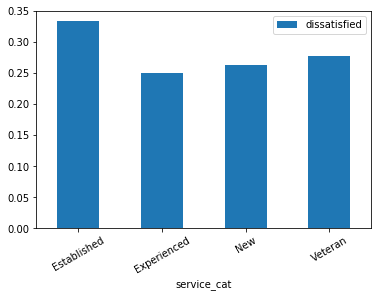

In [34]:
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Plot the results
%matplotlib inline
dis_pct.plot(kind='bar', rot=30)

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. 